In [1]:
import os
import numpy as np
import scipy.sparse as sp
import networkx as nx
from networkx import adjacency_matrix
import scanpy as sc
import pandas as pd
from sklearn.neighbors import kneighbors_graph as knn_g
from sklearn.preprocessing import minmax_scale
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from operator import itemgetter
import random
import matplotlib.pyplot as plt
import umap.umap_ as umap
import time

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset,TensorDataset,DataLoader
from torch.optim import Adam

import sys
sys.path.append('/data02/tguo/space_batch_effect')
from pytorch_revgrad import RevGrad
from AGC_DA_Layers import *
from utils import *
from GraphSAGE_pytorch.layers import MeanAggregator, LSTMAggregator, MaxPoolAggregator, MeanPoolAggregator,PoolAggregator
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [2]:
# import pandas as pd
# import numpy as np
# from utils import *
# dirs="/data02/tguo/space_batch_effect/simulate/"
# batch_sim="_1_2"
# types="_3batch_types6"
# B=3
# SEP=','
# net_cate='_KNN_'

# knn=10
# N_WALKS=knn
# WALK_LEN=1
# N_WALK_LEN=knn
# NUM_NEG=10

# feat_file=[]
# edge_file=[]
# meta_file=[]
# for i in range(B):
#     feat_file.append(dirs+"gtt_input/feat"+str(i+1)+batch_sim+types+".csv")
#     edge_file.append(dirs+"gtt_input/edge"+str(i+1)+net_cate+str(knn)+batch_sim+types+".csv")
#     meta_file.append(dirs+"gtt_input/meta"+str(i+1)+batch_sim+types+".csv")


# hvg_file=None
# dataset,pos_pairs,neg_pairs,feat,adj,dist=load_data(feat_file,edge_file,SEP,N_WALKS,WALK_LEN,N_WALK_LEN,NUM_NEG)
# x=minmax_scale(feat.values,axis=1)
# feat=pd.DataFrame(x,index=feat.index,columns=feat.columns)

# meta=pd.read_csv(meta_file[0],header=0,index_col=0)
# for i in np.arange(1,len(meta_file)):
#     meta=pd.concat((meta,pd.read_csv(meta_file[i],header=0,index_col=0)),axis=0)
# meta=meta.loc[feat.index,:].values
# ub=np.unique(meta[:,1])
# # Y=np.zeros((meta.shape[0],len(ub)))
# # for i in range(len(ub)):
# #     Y[np.where(meta[:,1]==ub[i])[0],i]=1
# Y=np.zeros(meta.shape[0])
# for i in range(len(ub)):
#     Y[np.where(meta[:,1]==ub[i])[0]]=i

# flags=batch_sim+types

Done walks for 0 nodes


In [2]:
# dirs="/data02/tguo/space_batch_effect/Hippo/"
# samples=["10X_Normal","10X_DAPI","10X_FFPE"]
# SEP=','
# net_cate='_KNN_'
# knn=6

# N_WALKS=6
# WALK_LEN=1
# N_WALK_LEN=6
# NUM_NEG=6

# feat_file=[]
# edge_file=[]
# meta_file=[]
# flags=''
# for i in range(len(samples)):
#     feat_file.append(dirs+"gtt_input/"+str(samples[i])+"_mat.csv")
#     edge_file.append(dirs+"gtt_input/"+str(samples[i])+"_edge"+net_cate+str(knn)+".csv")
#     meta_file.append(dirs+"gtt_input/"+str(samples[i])+"_meta.csv")
#     flags=flags+'_'+samples[i]
# hvg_file=None
# dataset,feat,adj,dist=load_data(feat_file,edge_file,SEP,N_WALKS,WALK_LEN,N_WALK_LEN,NUM_NEG)
# x=minmax_scale(feat.values,axis=1)
# feat=pd.DataFrame(x,index=feat.index,columns=feat.columns)
# # import numpy_indexed as npi
# # aset = set([tuple(x) for x in pos_pairs])
# # bset = set([tuple(x) for x in neg_pairs])
# # ii=np.array([x for x in aset & bset])
# # if(ii.shape[0]>0):
# #     pos_pairs=npi.difference(pos_pairs, ii)
# #     neg_pairs=npi.difference(neg_pairs, ii)
# # np.intersect1d(np.where(pos_pairs[:,0]<4221)[0],np.where(pos_pairs[:,1]>=4221)[0])

# meta=pd.read_csv(meta_file[0],header=0,index_col=0)
# for i in np.arange(1,len(meta_file)):
#     meta=pd.concat((meta,pd.read_csv(meta_file[i],header=0,index_col=0)),axis=0)
# meta=meta.values
# ub=np.unique(meta[:,1])
# Y=np.zeros(meta.shape[0])
# for i in range(len(ub)):
#     Y[np.where(meta[:,1]==ub[i])[0]]=i

In [2]:
# dirs="/data02/tguo/space_batch_effect/mouse_brain/"
# samples=["all_posterior1","all_posterior2","all_anterior1","all_anterior2"]
# SEP=','
# net_cate='_KNN_'
# knn=6

# N_WALKS=knn
# WALK_LEN=1
# N_WALK_LEN=knn
# NUM_NEG=6


# feat_file=[]
# edge_file=[]
# meta_file=[]
# flags=''
# for i in range(len(samples)):
#     feat_file.append(dirs+"gtt_input/"+str(samples[i])+"_mat.csv")
#     edge_file.append(dirs+"gtt_input/"+str(samples[i])+"_edge"+net_cate+str(knn)+".csv")
#     meta_file.append(dirs+"gtt_input/"+str(samples[i])+"_meta.csv")
#     flags=flags+'_'+samples[i]

# hvg_file=None
# dataset,feat,adj,dist=load_data(feat_file,edge_file,SEP,N_WALKS,WALK_LEN,N_WALK_LEN,NUM_NEG,dist_aware=False)
# x=minmax_scale(feat.values,axis=1)
# feat=pd.DataFrame(x,index=feat.index,columns=feat.columns)


# meta=pd.read_csv(meta_file[0],header=0,index_col=0)
# for i in np.arange(1,len(meta_file)):
#     meta=pd.concat((meta,pd.read_csv(meta_file[i],header=0,index_col=0)),axis=0)
# meta=meta.values
# ub=np.unique(meta[:,1])
# Y=np.zeros(meta.shape[0])
# for i in range(len(ub)):
#     Y[np.where(meta[:,1]==ub[i])[0]]=i

In [2]:
def load_data(feat_file,edge_file,SEP,N_WALKS,WALK_LEN,N_WALK_LEN,NUM_NEG,dist_aware=True,hvg_file=None):
    feat=pd.read_csv(feat_file[0],header=0,index_col=0,sep=SEP)
    edge=np.loadtxt(edge_file[0],dtype=str)
    if len(edge.shape)<2:
        edge=np.array([[i.split(":")[0],i.split(":")[1]] for i in edge])
    if len(feat_file)>1:
        for k in np.arange(1,len(feat_file)):
            a=pd.read_csv(feat_file[k],header=0,index_col=0,sep=SEP)
            if hvg_file is not None:
                a=a.loc[:,np.loadtxt(hvg_file,dtype=str)]
            feat=pd.concat((feat,a),axis=0)
            if k==1:
                a=pd.read_csv(edge_file[k],header=0,index_col=0).values
            else:
                a=np.loadtxt(edge_file[k],dtype=str)
            if len(a.shape)<2:
                a=np.array([[i.split(":")[0],i.split(":")[1]] for i in a])
            edge=np.vstack((edge,a))
    node_mapping=[{j:i for(i,j) in enumerate(feat.index)}]
    node_mapping=node_mapping[0]
    edge=np.array([[node_mapping[i[0]],node_mapping[i[1]]] for i in edge])
    adj=process_adj(edge,feat.shape[0])
   
    G=nx.Graph([(i[0],i[1]) for i in edge])
    dist=dict(nx.all_pairs_shortest_path_length(G))
    nodes=list(dist.keys())
    dataset=TensorDataset(torch.Tensor(list(nodes)).int())
    return dataset,feat,adj,dist

dirs="/data02/tguo/space_batch_effect/mouse_OB/"
samples=["10X","BGI","SlideV2"]
SEP=','
net_cate='_KNN_'
knn=['6','8','8']

N_WALKS=8
WALK_LEN=1
N_WALK_LEN=8
NUM_NEG=8

feat_file=[]
edge_file=[]
meta_file=[]
flags=''
for i in range(len(samples)):
    feat_file.append(dirs+"gtt_input/"+str(samples[i])+"_mat.csv")
    edge_file.append(dirs+"gtt_input/"+str(samples[i])+"_edge"+net_cate+knn[i]+".csv")
    meta_file.append(dirs+"gtt_input/"+str(samples[i])+"_meta.csv")
    flags=flags+'_'+samples[i]
hvg_file=None
dataset,feat,adj,dist=load_data(feat_file,edge_file,SEP,N_WALKS,WALK_LEN,N_WALK_LEN,NUM_NEG)
x=minmax_scale(feat.values,axis=1)
feat=pd.DataFrame(x,index=feat.index,columns=feat.columns)
meta=pd.read_csv(meta_file[0],header=0,index_col=0)
for i in np.arange(1,len(meta_file)):
    meta=pd.concat((meta,pd.read_csv(meta_file[i],header=0,index_col=0)),axis=0)
meta=meta.values
ub=np.unique(meta[:,1])
Y=np.zeros(meta.shape[0])
for i in range(len(ub)):
    Y[np.where(meta[:,1]==ub[i])[0]]=i
    
# idx=np.hstack((np.array(np.where(Y==0)[0].tolist()*10),np.where(Y==1)[0],np.where(Y==2)[0]))
# dataset=TensorDataset(torch.Tensor(idx).int())

In [2]:
# dirs="/data02/tguo/space_batch_effect/human_DLPFC_10x/"
# sample_name=[151507,151508,151509,151510,151669,151670,151671,151672,151673,151674,151675,151676]
# samples=["151673","151674","151675","151676"]
# SEP=','
# net_cate='_Radius_'
# rad=150

# N_WALKS=6
# WALK_LEN=1
# N_WALK_LEN=6
# NUM_NEG=6

# feat_file=[]
# edge_file=[]
# meta_file=[]
# flags=''
# flags1=samples[0]
# for i in range(1,len(samples)):
#     flags1=flags1+'-'+samples[i]
# for i in range(len(samples)):
#     feat_file.append(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[i])+"_features.txt")
#     edge_file.append(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[i])+"_edge_Radius_"+str(rad)+".csv")
#     meta_file.append(dirs+"gtt_input_scanpy/"+flags1+'_'+str(samples[i])+"_label.txt")
#     flags=flags+'_'+samples[i]
# hvg_file=None
# dataset,pos_pairs,neg_pairs,feat,adj,dist=load_data(feat_file,edge_file,SEP,N_WALKS,WALK_LEN,N_WALK_LEN,NUM_NEG)
# x=minmax_scale(feat.values,axis=1)
# feat=pd.DataFrame(x,index=feat.index,columns=feat.columns)
# # import numpy_indexed as npi
# # aset = set([tuple(x) for x in pos_pairs])
# # bset = set([tuple(x) for x in neg_pairs])
# # ii=np.array([x for x in aset & bset])
# # if(ii.shape[0]>0):
# #     pos_pairs=npi.difference(pos_pairs, ii)
# #     neg_pairs=npi.difference(neg_pairs, ii)
# # np.intersect1d(np.where(pos_pairs[:,0]<4221)[0],np.where(pos_pairs[:,1]>=4221)[0])

# meta=pd.read_csv(meta_file[0],header=0,index_col=0)
# for i in np.arange(1,len(meta_file)):
#     meta=pd.concat((meta,pd.read_csv(meta_file[i],header=0,index_col=0)),axis=0)
# meta=meta.values
# ub=np.unique(meta[:,1])
# Y=np.zeros(meta.shape[0])
# for i in range(len(ub)):
#     Y[np.where(meta[:,1]==ub[i])[0]]=i

Done walks for 0 nodes
Done walks for 1000 nodes
Done walks for 2000 nodes
Done walks for 3000 nodes
Done walks for 4000 nodes
Done walks for 5000 nodes
Done walks for 6000 nodes
Done walks for 7000 nodes
Done walks for 8000 nodes
Done walks for 9000 nodes
Done walks for 10000 nodes
Done walks for 11000 nodes
Done walks for 12000 nodes
Done walks for 13000 nodes
Done walks for 14000 nodes


In [4]:
# dirs="/data02/tguo/space_batch_effect/slide-seq/"
# sample_name=['Puck_180531_13', 'Puck_180531_16', 'Puck_180531_17','Puck_180531_18', 'Puck_180531_19', 'Puck_180531_22','Puck_180531_23']
# samples=['Puck_180531_13', 'Puck_180531_16', 'Puck_180531_17']
# SEP=','
# net_cate='_KNN_'
# knn=6

# N_WALKS=knn
# WALK_LEN=1
# N_WALK_LEN=6
# NUM_NEG=6

# feat_file=[]
# edge_file=[]
# meta_file=[]
# flags=''
# for i in range(len(samples)):
#     feat_file.append(dirs+"gtt_input/"+str(samples[i])+"_scanpy_mat.csv")
#     edge_file.append(dirs+"gtt_input/"+str(samples[i])+"_edge_KNN_"+str(knn)+".csv")
#     meta_file.append(dirs+"gtt_input/"+str(samples[i])+"_STAGATE_meta.csv")
#     flags=flags+'_'+samples[i]
# hvg_file=None
# dataset,pos_pairs,neg_pairs,feat,adj,dist=load_data(feat_file,edge_file,SEP,N_WALKS,WALK_LEN,N_WALK_LEN,NUM_NEG)
# x=minmax_scale(feat.values,axis=1)
# feat=pd.DataFrame(x,index=feat.index,columns=feat.columns)
# # import numpy_indexed as npi
# # aset = set([tuple(x) for x in pos_pairs])
# # bset = set([tuple(x) for x in neg_pairs])
# # ii=np.array([x for x in aset & bset])
# # if(ii.shape[0]>0):
# #     pos_pairs=npi.difference(pos_pairs, ii)
# #     neg_pairs=npi.difference(neg_pairs, ii)
# # np.intersect1d(np.where(pos_pairs[:,0]<4221)[0],np.where(pos_pairs[:,1]>=4221)[0])

# meta=pd.read_csv(meta_file[0],header=0,index_col=0)
# for i in np.arange(1,len(meta_file)):
#     meta=pd.concat((meta,pd.read_csv(meta_file[i],header=0,index_col=0)),axis=0)
# meta=meta.values
# ub=np.unique(meta[:,0])
# Y=np.zeros(meta.shape[0])
# for i in range(len(ub)):
#     Y[np.where(meta[:,0]==ub[i])[0]]=i

Done walks for 0 nodes
Done walks for 1000 nodes
Done walks for 2000 nodes
Done walks for 3000 nodes
Done walks for 4000 nodes


/home/tguo/tguo2/miniconda3/envs/stnet/lib/python3.6/site-packages/numba/np/ufunc/parallel.py:365: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 6103. The TBB threading layer is disabled.
  warnings.warn(problem)


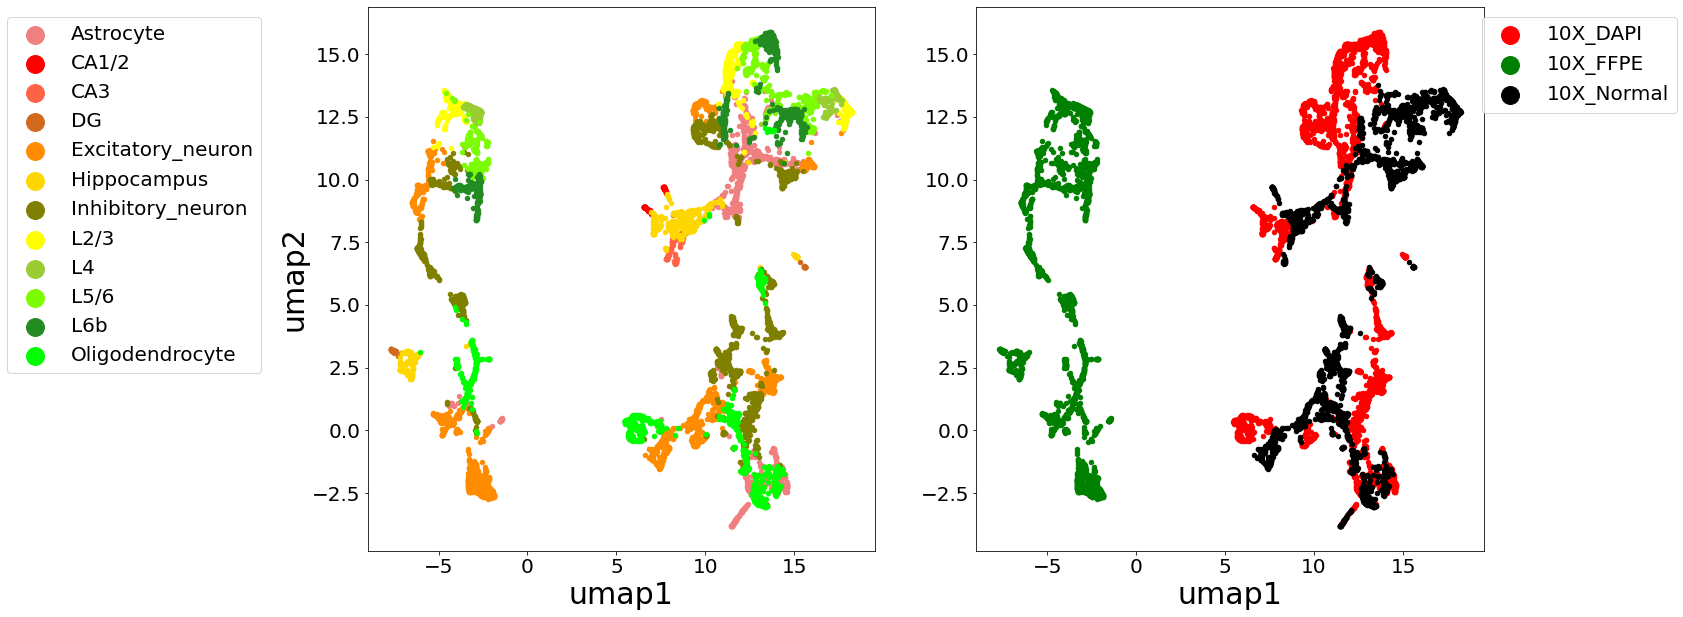

In [4]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
celltype=meta[:,0]
batch=meta[:,1]
ul=np.unique(celltype)
ub=np.unique(batch)
x=PCA(n_components=50).fit_transform(feat.values)
umap_mat=umap.UMAP().fit_transform(x)
colour2=['r','g','black','cyan','blue','purple','grey']
colour1=['lightcoral','red','tomato','chocolate','darkorange','gold','olive','yellow','yellowgreen','lawngreen','forestgreen','lime',
       'cyan','deepskyblue','dodgerblue','royalblue','blue','blueviolet','purple','fuchsia','hotpink','pink','gray','black','teal']
f, axs= plt.subplots(1,2,figsize=(20,10))
size=20
for i in range(len(ul)):
    axs[0].scatter(umap_mat[np.where(celltype==ul[i])[0],0],umap_mat[np.where(celltype==ul[i])[0],1],c=colour1[i],s=size)

axs[0].set_xlabel("umap1",fontsize=30)
axs[0].set_ylabel("umap2",fontsize=30)
axs[0].legend(ul,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(-0.19,1))
axs[0].tick_params(axis='both', which='major', labelsize=20)
for i in range(len(ub)):
    axs[1].scatter(umap_mat[np.where(batch==ub[i])[0],0],umap_mat[np.where(batch==ub[i])[0],1],c=colour2[i],s=size)
axs[1].set_xlabel("umap1",fontsize=30)
axs[1].legend(ub,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(1.4,1))
axs[1].tick_params(axis='both', which='major', labelsize=20)

In [3]:
class A_G_Combination(nn.Module):
    def __init__(self, AEdims, AEdimsR,GSdims,agg_class,num_samples,zdim,beta):
        super(A_G_Combination, self).__init__()
        AEzdim=AEdims[-1]
        GSzdim=GSdims[-1]
        self.ae=AE(AEdims, AEdimsR)
        self.gs=GraphSAGE(AEdims[0],GSdims,agg_class,num_samples=num_samples)
        self.beta=beta
#         self.combine_layer=nn.Linear(AEzdim+GSzdim,zdim)
    def forward(self,x,node_layers, mappings,rows,de_act):
        x1=x[[mappings[0][i] for i in node_layers[-1]],:]
        _,ae_z=self.ae.en(x1)
        gs_z=self.gs(x,node_layers, mappings,rows)
#         z=self.combine_layer(torch.cat((ae_z,gs_z),dim=1))
        z=(1-self.beta)*ae_z+self.beta*gs_z
        _,x_bar=self.ae.de(z,de_act)
        final_z=[ae_z,gs_z,z]
        return final_z,x_bar,x1
    
class A_G_Combination_DA_complex(nn.Module):
    def __init__(self, AEdims, AEdimsR,GSdims,agg_class,num_samples,zdim,znoise_dim,beta,CLdims,DIdims):
        super(A_G_Combination_DA_complex, self).__init__()
        self.znoise_dim=znoise_dim
        self.agc=A_G_Combination(AEdims, AEdimsR,GSdims,agg_class,num_samples,zdim,beta)
        self.clas=Classifier(CLdims)
        self.disc=Discriminator(DIdims)
    def forward(self,x,node_layers, mappings,rows,lamda,de_act,cl_act):
        self.revgrad=RevGrad(lamda)
        final_z,x_bar,x1=self.agc(x,node_layers, mappings,rows,de_act)
        ae_z,gs_z,z=final_z
        znoise=z[:,:self.znoise_dim]
        zbio=z[:,self.znoise_dim:]
        clas_out=self.clas(znoise,act=cl_act)
        disc_out=self.disc(self.revgrad(zbio),act=cl_act)
        ae_out=[x_bar,x1]
        return final_z,ae_out,clas_out,disc_out

In [10]:
# ###网络结构参数###
# zdim=32
# x_dim=feat.shape[1]
# h_dim=[512]
# h_dimR=list(reversed(h_dim))
# AEdims=[x_dim,h_dim,zdim]
# AEdimsR=[zdim,h_dimR,x_dim]
# GSdims=[512,zdim]
# znoise_dim=4
# CLdims=[znoise_dim,[],len(ub)]
# DIdims=[zdim-znoise_dim,[32,16],len(ub)]
# ###网络选择####
# num_samples=20
# agg_class=[MeanAggregator,PoolAggregator,MaxPoolAggregator,MeanPoolAggregator,LSTMAggregator]
# agg_class=agg_class[0]
# de_act=nn.Sigmoid()
# cl_act=nn.Softmax(dim=1)
# ###训练参数####
# BS=128
# epochs=50
# epoch_point=100
# lr=1e-3
# weight_decay=5e-4
# alpha1=x_dim
# alpha2=1.0
# alpha3=1.0
# alpha4=1.0
# lamda=1.0
# beta=1.0
# Q=10
# MARGIN=3
# len_dataloader=feat.shape[0]//BS

# model=A_G_Combination_DA_complex(AEdims, AEdimsR,GSdims,agg_class,num_samples,zdim,znoise_dim,beta,CLdims,DIdims).cuda()
# optimizer=Adam(model.parameters(),lr=lr,weight_decay=weight_decay)
# data_loader=DataLoader(dataset=dataset, batch_size=BS,shuffle=True,num_workers=8,drop_last=True)
# unsupervised_loss=UnsupervisedLoss(adj.tolil().rows, dist, Q,N_WALKS,WALK_LEN,N_WALK_LEN,NUM_NEG,MARGIN)


model.train()
print('--------------------------------')
print('Training.')
for epoch in range(epochs):
    print('Epoch {} / {}'.format(epoch+1, epochs))
    total_loss=0.0;AE_loss=0.0;GS_loss=0.0;CLAS_loss=0;DISC_loss=0
    t=time.time()
    for (batch_idx, target_idx) in enumerate(data_loader):
        target_idx=target_idx[0]
        all_idx=np.asarray(list(unsupervised_loss.extend_nodes(target_idx.tolist())))
        all_layer,all_mapping=layer_map(all_idx.tolist(),adj,len(GSdims))
        all_rows=adj.tolil().rows[all_layer[0]]
        all_feature=torch.Tensor(feat.iloc[all_layer[0],:].values).float().cuda()
        all_embed,ae_out,clas_out,disc_out=model(all_feature,all_layer,all_mapping,all_rows,lamda,de_act,cl_act)
        [ae_embed,gs_embed,embed]=all_embed
        [x_bar,x]=ae_out
        true_batch=torch.Tensor(Y[all_layer[-1]]).long().cuda()
        gs_loss=unsupervised_loss.get_loss_xent(embed, all_idx)
        ae_loss=nn.BCELoss()(x_bar,x)
        clas_loss=nn.CrossEntropyLoss()(clas_out,true_batch)
        disc_loss=nn.CrossEntropyLoss()(disc_out,true_batch)
        loss=ae_loss*alpha1+gs_loss*alpha2+clas_loss*alpha3+disc_loss*alpha4
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss+=loss.item()
        AE_loss+=ae_loss.item()
        GS_loss+=gs_loss.item()
        CLAS_loss+=clas_loss.item()
        DISC_loss+=disc_loss.item()

    aa=(batch_idx+1)
    print('time/total_loss/AE_loss/GS_loss/clas_loss/disc_loss=','%.5f/%.5f/%.5f/%.5f/%.5f/%.5f'%((time.time()-t),total_loss/aa,AE_loss/aa,GS_loss/aa,
                                                                                       CLAS_loss/aa,DISC_loss/aa))
print('Finished training.')
print('--------------------------------')
torch.save(model.state_dict(),dirs+"model/AGC_DA_complex"+flags+"_xent.pt")

--------------------------------
Training.
Epoch 1 / 50
time/total_loss/AE_loss/GS_loss/clas_loss/disc_loss= 1285.42570/388.66820/0.06982/1.19595/0.60871/0.70590
Epoch 2 / 50
time/total_loss/AE_loss/GS_loss/clas_loss/disc_loss= 1281.77293/388.16026/0.06972/1.19834/0.60905/0.70426
Epoch 3 / 50
time/total_loss/AE_loss/GS_loss/clas_loss/disc_loss= 1284.43432/387.91225/0.06968/1.19820/0.60919/0.70427
Epoch 4 / 50
time/total_loss/AE_loss/GS_loss/clas_loss/disc_loss= 1289.25932/387.98643/0.06969/1.20165/0.60885/0.70271
Epoch 5 / 50
time/total_loss/AE_loss/GS_loss/clas_loss/disc_loss= 1299.46854/387.54509/0.06961/1.19999/0.60875/0.70165
Epoch 6 / 50
time/total_loss/AE_loss/GS_loss/clas_loss/disc_loss= 1307.52314/387.39575/0.06959/1.20355/0.60874/0.70057
Epoch 7 / 50
time/total_loss/AE_loss/GS_loss/clas_loss/disc_loss= 1287.96956/386.64802/0.06945/1.20372/0.60890/0.69919
Epoch 8 / 50
time/total_loss/AE_loss/GS_loss/clas_loss/disc_loss= 1307.29163/386.87197/0.06949/1.20428/0.60949/0.69936
Epoch

KeyboardInterrupt: 

In [17]:
# model.load_state_dict(torch.load(dirs+"model/AGC_DA_complex"+flags+"_xent.pt"))
model.eval()
all_idx=np.arange(feat.shape[0])
all_layer,all_mapping=layer_map(all_idx.tolist(),adj,len(GSdims))
all_rows=adj.tolil().rows[all_layer[0]]
all_feature=torch.Tensor(feat.iloc[all_layer[0],:].values).float().cuda()
all_embed,ae_out,clas_out,disc_out=model(all_feature,all_layer,all_mapping,all_rows,lamda,de_act,cl_act)
[ae_embed,gs_embed,embed]=all_embed
[x_bar,x]=ae_out
embed=embed.cpu().detach()
x_bar=np.array(x_bar.cpu().detach())
names=['GTT_'+str(i) for i in range(embed.shape[1])]
embed1=pd.DataFrame(np.array(embed),index=feat.index,columns=names)
embed1.to_csv(dirs+"gtt_output/AGC_embed"+flags+"_xent.csv")
# x_bar1=pd.DataFrame(x_bar,index=feat.index,columns=feat.columns)
# x_bar1.to_csv(dirs+"gtt_output/AGC_exp"+flags+"_xent.csv")
# embed_new=torch.cat((torch.zeros((embed.shape[0],znoise_dim)),embed[:,znoise_dim:]),dim=1)
# xbar_new=np.array(model.agc.ae.de(embed_new.cuda(),de_act)[1].cpu().detach())
# xbar_new1=pd.DataFrame(xbar_new,index=feat.index,columns=feat.columns)
# xbar_new1.to_csv(dirs+"gtt_output/AGC_exp_corrected0"+flags+"_xent.csv")

In [12]:
celltype=meta[:,0]
celltype=celltype[list(all_mapping[-1].keys())]
batch=meta[:,1]
batch=batch[list(all_mapping[-1].keys())]
ul=np.unique(celltype)
ub=np.unique(batch)

In [13]:
ub=['SlideV2','BGI','10X']
# celltype[(celltype=='GCL_1')|(celltype=='GCL_2')]='GCL'
# celltype[(celltype=='GL_1')|(celltype=='GL_2')]='GL'
# celltype[celltype=='SEZ']='GCL'
# celltype[celltype=='Meninges']='ONL'
# celltype[celltype=='OPL']='EPL'
# ul=np.unique(celltype)
# ul=['ONL','GL','EPL','MCL','GCL']

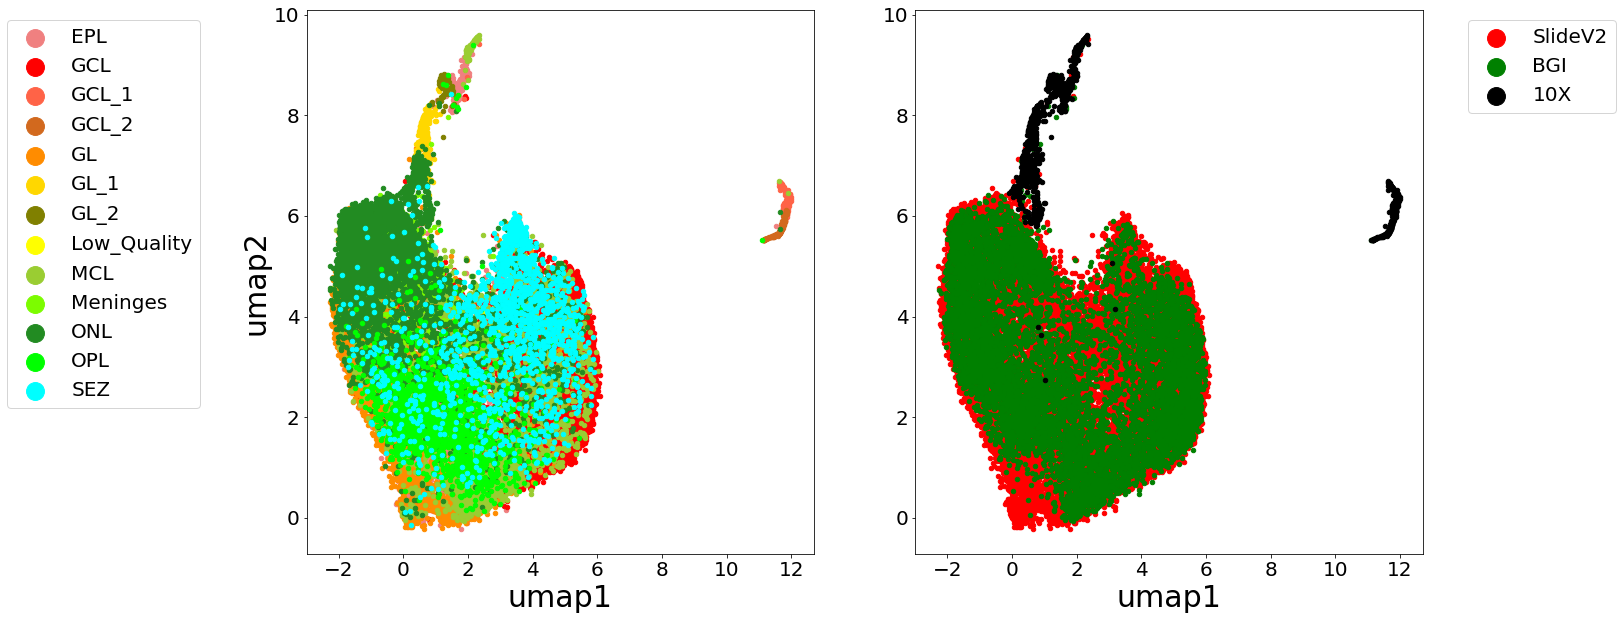

In [16]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
# x=PCA(n_components=30).fit_transform(x_bar.cpu().detach())
umap_mat=umap.UMAP().fit_transform(embed[:,znoise_dim:])
colour2=['r','g','black','cyan','blue','purple','grey']
colour1=['lightcoral','red','tomato','chocolate','darkorange','gold','olive','yellow','yellowgreen','lawngreen','forestgreen','lime',
       'cyan','deepskyblue','dodgerblue','royalblue','blue','blueviolet','purple','fuchsia','hotpink','pink','gray','black','teal']
f, axs= plt.subplots(1,2,figsize=(20,10))
size=20
for i in range(len(ul)):
    axs[0].scatter(umap_mat[np.where(celltype==ul[i])[0],0],umap_mat[np.where(celltype==ul[i])[0],1],c=colour1[i],s=size)

axs[0].set_xlabel("umap1",fontsize=30)
axs[0].set_ylabel("umap2",fontsize=30)
axs[0].legend(ul,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(-0.19,1))
axs[0].tick_params(axis='both', which='major', labelsize=20)
for i in range(len(ub)):
    axs[1].scatter(umap_mat[np.where(batch==ub[i])[0],0],umap_mat[np.where(batch==ub[i])[0],1],c=colour2[i],s=size)
axs[1].set_xlabel("umap1",fontsize=30)
axs[1].legend(ub,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(1.4,1))
axs[1].tick_params(axis='both', which='major', labelsize=20)

In [15]:
feat.shape

(28549, 5531)

In [55]:
from  pydiffmap.diffusion_map import DiffusionMap as DM
dm=DM.from_sklearn(n_evecs = 2, alpha = 0.5, epsilon = 'bgh', k=64)
dm_umap=dm.fit_transform(embed1.iloc[:,znoise_dim:].values)

KeyboardInterrupt: 

In [ ]:
f, axs= plt.subplots(1,2,figsize=(20,10))
size=20
for i in range(len(ul)):
    axs[0].scatter(dm_umap[np.where(celltype==ul[i])[0],0],dm_umap[np.where(celltype==ul[i])[0],1],c=colour2[i],s=size)

axs[0].set_xlabel("umap1",fontsize=30)
axs[0].set_ylabel("umap2",fontsize=30)
axs[0].legend(ul,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(-0.19,1))
axs[0].tick_params(axis='both', which='major', labelsize=20)
for i in range(len(ub)):
    axs[1].scatter(dm_umap[np.where(batch==ub[i])[0],0],dm_umap[np.where(batch==ub[i])[0],1],c=colour2[i],s=size)
axs[1].set_xlabel("umap1",fontsize=30)
axs[1].legend(ub,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(1.4,1))
axs[1].tick_params(axis='both', which='major', labelsize=20)

In [9]:
dirs="/data02/tguo/space_batch_effect/mouse_OB/"
embed1=pd.read_csv(dirs+"gtt_output/AGC_embed"+flags+"_xent.csv",header=0,index_col=0)
embed2=pd.read_csv(dirs+"methods/seurat_mat"+flags+".txt",header=0,index_col=0)
embed3=pd.read_csv(dirs+"methods/harmony_mat"+flags+".txt",header=0,index_col=0)
# embed4=pd.read_csv(dirs+"methods/harmony_SEDR_mat"+flags+".txt",header=0,index_col=0)
# embed5=pd.read_csv(dirs+"methods/harmony_STAGATE_mat"+flags+".txt",header=0,index_col=0)
# embed6=pd.read_csv(dirs+"methods/scidrl_mat"+flags+".csv",header=0,index_col=0)

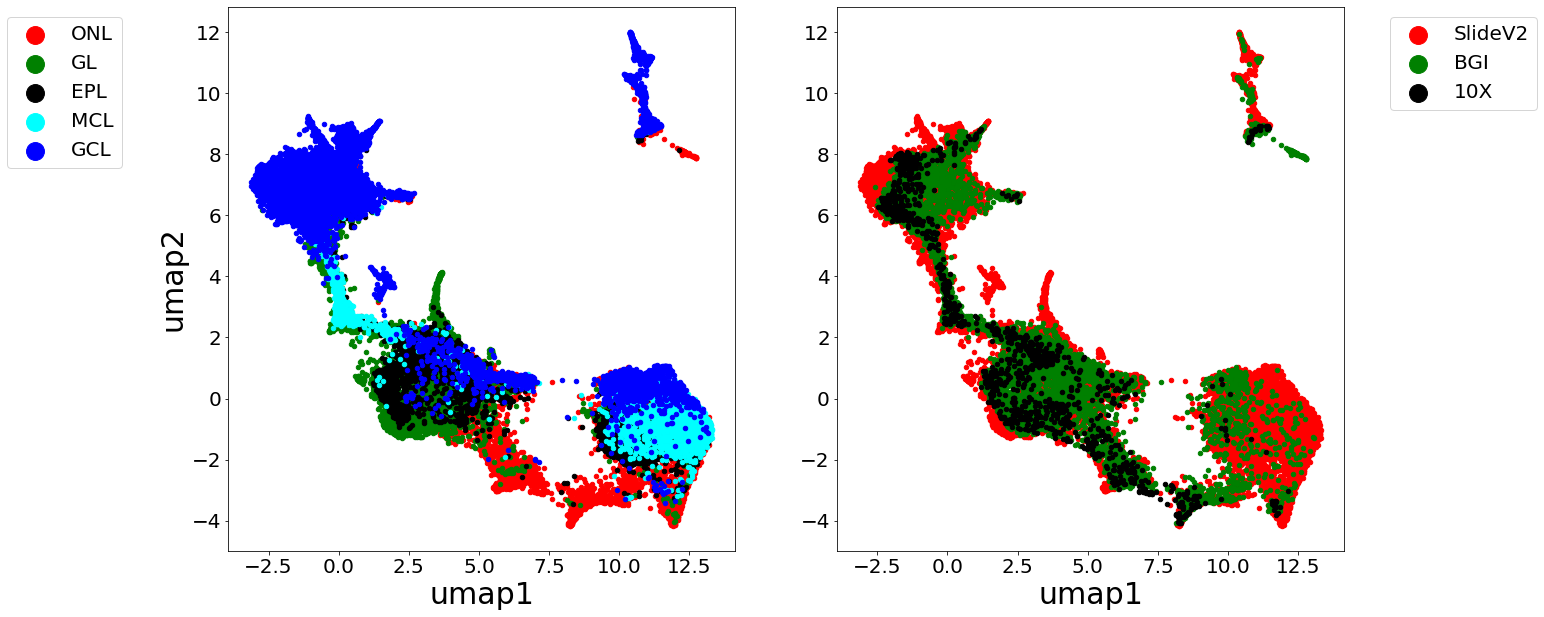

In [56]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
# x=PCA(n_components=30).fit_transform(x_bar.cpu().detach())
umap_mat=umap.UMAP().fit_transform(embed3.values[:,:])
f, axs= plt.subplots(1,2,figsize=(20,10))
size=20
for i in range(len(ul)):
    axs[0].scatter(umap_mat[np.where(celltype==ul[i])[0],0],umap_mat[np.where(celltype==ul[i])[0],1],c=colour2[i],s=size)

axs[0].set_xlabel("umap1",fontsize=30)
axs[0].set_ylabel("umap2",fontsize=30)
axs[0].legend(ul,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(-0.19,1))
axs[0].tick_params(axis='both', which='major', labelsize=20)
for i in range(len(ub)):
    axs[1].scatter(umap_mat[np.where(batch==ub[i])[0],0],umap_mat[np.where(batch==ub[i])[0],1],c=colour2[i],s=size)
axs[1].set_xlabel("umap1",fontsize=30)
axs[1].legend(ub,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(1.4,1))
axs[1].tick_params(axis='both', which='major', labelsize=20)

In [15]:
import anndata
from sklearn.metrics.pairwise import cosine_similarity
import scanpy as sc
import pandas as pd
from matplotlib import rcParams

idx1=np.where(batch==ub[0])[0]
idx2=np.where(batch==ub[1])[0]
idx3=np.where(batch==ub[2])[0]
x_bar1=x_bar.iloc[idx1,:]
x_bar2=x_bar.iloc[idx2,:]
x_bar3=x_bar.iloc[idx3,:]
feat1=feat.iloc[idx1,:]
feat2=feat.iloc[idx2,:]
feat3=feat.iloc[idx3,:]
feat_org=pd.read_csv(feat_file[0],index_col=0,header=0,sep=',')
for i in np.arange(1,len(feat_file)):
    feat_org=pd.concat((feat_org,pd.read_csv(feat_file[i],index_col=0,header=0,sep=',')))
feat_org1=feat_org.iloc[idx1,:]
feat_org2=feat_org.iloc[idx2,:]
feat_org3=feat_org.iloc[idx3,:]
coord_file=[]
for i in range(len(samples)):
    coord_file.append(dirs+"gtt_input/"+str(samples[i])+"_coord.csv")
coord=pd.read_csv(coord_file[0],index_col=0,header=0,sep=',')
for i in np.arange(1,len(samples)):
    coord=pd.concat((coord,pd.read_csv(coord_file[i],index_col=0,header=0,sep=',')))

... storing 'celltype' as categorical
... storing 'batch' as categorical


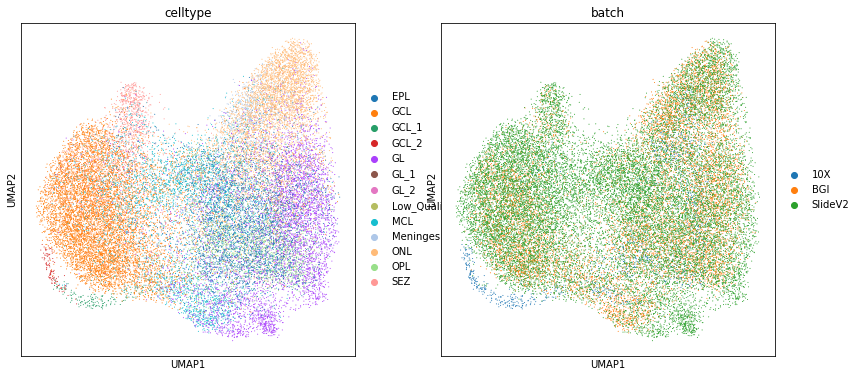

In [17]:
adata=anndata.AnnData(feat_org)
adata.obsm['GraphSCIDRL']=embed[:,znoise_dim:]
adata.obs['celltype']=celltype
adata.obs['batch']=batch
coord = coord.loc[adata.obs_names, ['x', 'y']]
adata.obsm["spatial"] = coord.to_numpy()
sc.pp.neighbors(adata, use_rep='GraphSCIDRL')
sc.tl.umap(adata)
sc.tl.leiden(adata,resolution=1.0)
adata.obs['GraphSCIDRL_clust']=adata.obs['leiden']
adata.obsm['GraphSCIDRL_umap']=adata.obsm['X_umap']
plt.rcParams["figure.figsize"] = (6, 6)
sc.pl.umap(adata, color=["celltype",'batch'], title=["celltype","batch"])
adata_org=adata